In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [3]:
def check_NaN(data):
    # Select only numeric columns for spline interpolation
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    print("Number of NaN values:\n", data[numeric_columns].isna().sum())
    
def count_missing_coumns_by_month(df, columns):
    df['Date'] = pd.to_datetime(df['Date'])
    df['YearMonth'] = df ['Date'].dt.to_period('M')
    
    missing_counts = df.groupby('YearMonth')[columns].apply(lambda x: x.isnull().sum())
    
    missing_counts = missing_counts[(missing_counts > 0).any(axis=1)]
    
    print("Number of missing values by month and yr where any column is null:")
    print(missing_counts)
    
def exact_missing_date(df, column):
    if column not in df.columns:
        print(f"Column {column} does not exist in the dataframe.")
        return
    
    null_dates = df[df[column].isna()]["Date"].unique()
    
    if len(null_dates) == 0:
        print(f"No missing dates found in column {column}.")
    else:
        print(f"Missing values for {column} are in the following dates:")
        for date in null_dates:
            print(date)
def print_date_range(data):
    """
    Function to print the earliest and latest dates in the 'Date' column of a DataFrame.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing a 'Date' column.
    """
    # Ensure the 'Date' column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop any rows where 'Date' could not be converted to a valid datetime
    data = data.dropna(subset=['Date'])

    # Find the earliest and latest dates
    earliest_date = data['Date'].min()
    latest_date = data['Date'].max()

    # Print the results
    print(f"Earliest Date: {earliest_date}")
    print(f"Latest Date: {latest_date}")

In [4]:
# Define the date range
# "2024-07-01 00:00" "2024-07-30 23:00"
start_date = "2024-07-01 00:00"
end_date = "2024-08-15 23:00"


In [29]:
# Load original data
original_data = pd.read_csv("../../DATAFORMODELtrain200824.csv")

# Convert 'Date' column to datetime format
original_data['Date'] = pd.to_datetime(original_data['Date'], errors='coerce').dt.round('h')

In [30]:
extract_features = pd.read_csv("../Prophet/features_for_Prophet.csv")

In [31]:
exact_missing_date(extract_features, 'COAL')

No missing dates found in column COAL.


In [32]:
check_NaN(extract_features)

Number of NaN values:
 GAS               0
COAL              0
PMIHU             0
CO2               0
COALTOGAS         0
UNAVGASRO         0
UNAVGASHU         0
UNAVTPPBG         0
UNAVGASALL        0
UNAVTPPRO         0
UNAVTPPHU         0
UNAVTPPGR         0
UNAVLIGNRO        0
UNAVHYDRALL       0
Y                 0
UNAVGASGR         0
UNAVLIGNBG        0
SOLMAX            0
UNAVNUCALL        0
UNAVHYDRBG        0
UNAVNUCFR         0
UNAVTPPCZ         0
UNAVLIGNCZ        0
T2MALLPCO2        0
UNAVTPPSL         0
UNAVLIGNSL        0
UA_HU             0
UNAVLIGNALL       0
UNAVGASCZ         0
UA_EU             0
PriceHU        3168
dtype: int64


In [33]:
len(extract_features)

78912

In [34]:
print_date_range(extract_features)

Earliest Date: 2016-01-01 00:00:00
Latest Date: 2024-12-31 23:00:00


In [35]:
extract_features.head()

,GAS,COAL,PMIHU,CO2,COALTOGAS,UNAVGASRO,UNAVGASHU,UNAVTPPBG,UNAVGASALL,UNAVTPPRO,UNAVTPPHU,UNAVTPPGR,UNAVLIGNRO,UNAVHYDRALL,Y,UNAVGASGR,UNAVLIGNBG,SOLMAX,UNAVNUCALL,UNAVHYDRBG,UNAVNUCFR,UNAVTPPCZ,UNAVLIGNCZ,T2MALLPCO2,UNAVTPPSL,UNAVLIGNSL,UA_HU,UNAVLIGNALL,UNAVGASCZ,UA_EU,Date,PriceHU
0,15.3,47.75,49.1,7.45,3.120915,207.0,25.0,227,232.0,1234.0,112.0,432,917.0,194.0,2016,432,227,562.0,564.0,0,7210,1943.0,1219.0,70.824667,787,787,445,3237.0,0,510,2016-01-01 00:00:00,32.90
1,15.3,47.75,49.1,7.45,3.120915,956.0,168.0,227,1124.0,2639.0,255.0,432,1378.0,194.0,2016,432,227,562.0,1156.0,0,7210,2238.0,1514.0,70.750167,787,787,445,3993.0,0,510,2016-01-01 01:00:00,33.34
2,15.3,47.75,49.1,7.45,3.120915,956.0,168.0,227,1124.0,2639.0,255.0,432,1378.0,194.0,2016,432,227,562.0,1156.0,0,7210,2252.0,1528.0,70.179000,787,787,445,4007.0,0,445,2016-01-01 02:00:00,30.95
3,15.3,47.75,49.1,7.45,3.120915,956.0,168.0,227,1124.0,2639.0,255.0,432,1378.0,194.0,2016,432,227,562.0,1156.0,0,7210,2252.0,1528.0,68.664167,787,787,445,4007.0,0,445,2016-01-01 03:00:00,26.28
4,15.3,47.75,49.1,7.45,3.120915,956.0,168.0,227,1124.0,2639.0,255.0,432,1378.0,194.0,2016,432,227,562.0,1156.0,0,7935,2252.0,1528.0,66.950667,787,787,445,4007.0,0,445,2016-01-01 04:00:00,24.74


In [36]:
# Filter original data for the specified date range
original_data_filtered = original_data[(original_data['Date'] >= start_date) & (original_data['Date'] <= end_date)]

In [40]:
# Load forecasted results
forecasted_data = pd.read_csv("../Prophet/prophet_forecast.csv")

# Convert 'ds' (Date) column to datetime format
forecasted_data['ds'] = pd.to_datetime(forecasted_data['ds'], errors='coerce').dt.round('h')

# Filter forecasted data for the specified date range
forecasted_data_filtered = forecasted_data[(forecasted_data['ds'] >= start_date) & (forecasted_data['ds'] <= end_date)]


In [41]:
forecasted_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CO2,CO2_lower,CO2_upper,COAL,COAL_lower,COAL_upper,COALTOGAS,COALTOGAS_lower,COALTOGAS_upper,GAS,GAS_lower,GAS_upper,PMIHU,PMIHU_lower,PMIHU_upper,SOLMAX,SOLMAX_lower,SOLMAX_upper,T2MALLPCO2,T2MALLPCO2_lower,T2MALLPCO2_upper,UA_EU,UA_EU_lower,UA_EU_upper,UA_HU,UA_HU_lower,UA_HU_upper,UNAVGASALL,UNAVGASALL_lower,UNAVGASALL_upper,UNAVGASCZ,UNAVGASCZ_lower,UNAVGASCZ_upper,UNAVGASGR,UNAVGASGR_lower,UNAVGASGR_upper,UNAVGASHU,UNAVGASHU_lower,UNAVGASHU_upper,UNAVGASRO,UNAVGASRO_lower,UNAVGASRO_upper,UNAVHYDRALL,UNAVHYDRALL_lower,UNAVHYDRALL_upper,UNAVHYDRBG,UNAVHYDRBG_lower,UNAVHYDRBG_upper,UNAVLIGNALL,UNAVLIGNALL_lower,UNAVLIGNALL_upper,UNAVLIGNBG,UNAVLIGNBG_lower,UNAVLIGNBG_upper,UNAVLIGNCZ,UNAVLIGNCZ_lower,UNAVLIGNCZ_upper,UNAVLIGNRO,UNAVLIGNRO_lower,UNAVLIGNRO_upper,UNAVLIGNSL,UNAVLIGNSL_lower,UNAVLIGNSL_upper,UNAVNUCALL,UNAVNUCALL_lower,UNAVNUCALL_upper,UNAVNUCFR,UNAVNUCFR_lower,UNAVNUCFR_upper,UNAVTPPBG,UNAVTPPBG_lower,UNAVTPPBG_upper,UNAVTPPCZ,UNAVTPPCZ_lower,UNAVTPPCZ_upper,UNAVTPPGR,UNAVTPPGR_lower,UNAVTPPGR_upper,UNAVTPPHU,UNAVTPPHU_lower,UNAVTPPHU_upper,UNAVTPPRO,UNAVTPPRO_lower,UNAVTPPRO_upper,UNAVTPPSL,UNAVTPPSL_lower,UNAVTPPSL_upper,Y,Y_lower,Y_upper,daily,daily_lower,daily_upper,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2024-07-01 00:00:00,83.091576,26.252376,106.316529,83.091576,83.091576,0.047741,0.047741,0.047741,-0.008239,-0.008239,-0.008239,-0.042173,-0.042173,-0.042173,-0.033874,-0.033874,-0.033874,0.010823,0.010823,0.010823,0.037791,0.037791,0.037791,-0.174987,-0.174987,-0.174987,0.100432,0.100432,0.100432,0.052986,0.052986,0.052986,-0.062014,-0.062014,-0.062014,0.460628,0.460628,0.460628,0.005564,0.005564,0.005564,0.002444,0.002444,0.002444,-0.349891,-0.349891,-0.349891,0.019494,0.019494,0.019494,-0.154478,-0.154478,-0.154478,0.068911,0.068911,0.068911,-0.034984,-0.034984,-0.034984,-0.005313,-0.005313,-0.005313,-0.039073,-0.039073,-0.039073,0.611825,0.611825,0.611825,0.016688,0.016688,0.016688,-0.035837,-0.035837,-0.035837,0.090404,0.090404,0.090404,0.000003,0.000003,0.000003,0.003257,0.003257,0.003257,-0.035256,-0.035256,-0.035256,-0.034454,-0.034454,-0.034454,-0.649016,-0.649016,-0.649016,-0.01813,-0.01813,-0.01813,-0.170855,-0.170855,-0.170855,-0.148727,-0.148727,-0.148727,-0.191757,-0.191757,-0.191757,-0.103457,-0.103457,-0.103457,0.231282,0.231282,0.231282,0.0,0.0,0.0,67.158175
1,2024-07-01 01:00:00,83.098546,31.114079,110.596582,83.098546,83.098546,0.047741,0.047741,0.047741,-0.008239,-0.008239,-0.008239,-0.042173,-0.042173,-0.042173,-0.033874,-0.033874,-0.033874,0.010823,0.010823,0.010823,0.037791,0.037791,0.037791,-0.167414,-0.167414,-0.167414,0.108293,0.108293,0.108293,0.058459,0.058459,0.058459,-0.110965,-0.110965,-0.110965,0.469020,0.469020,0.469020,0.021852,0.021852,0.021852,-0.036476,-0.036476,-0.036476,-0.226180,-0.226180,-0.226180,0.019494,0.019494,0.019494,-0.154478,-0.154478,-0.154478,0.137957,0.137957,0.137957,-0.034984,-0.034984,-0.034984,-0.061446,-0.061446,-0.061446,-0.039073,-0.039073,-0.039073,0.611825,0.611825,0.611825,0.006606,0.006606,0.006606,-0.035837,-0.035837,-0.035837,0.090404,0.090404,0.090404,0.000003,0.000003,0.000003,-0.002397,-0.002397,-0.002397,-0.048527,-0.048527,-0.048527,-0.023180,-0.023180,-0.023180,-0.649016,-0.649016,-0.649016,-0.01813,-0.01813,-0.01813,-0.226228,-0.226228,-0.226228,-0.072122,-0.072122,-0.072122,-0.158095,-0.158095,-0.158095,-0.090492,-0.090492,-0.090492,0.230747,0.230747,0.230747,0.0,0.0,0.0,69.961043
2,2024-07-01 02:00:00,83.105515,28.114121,106.541215,83.105515,83.105515,0.047741,0.047741,0.047741,-0.008239,-0.008239,-0.008239,-0.042173,-0.042173,-0.042173,-0.033874,-0.033874,-0.033874,0.010823,0.010823,0.010823,0.037791,0.03779

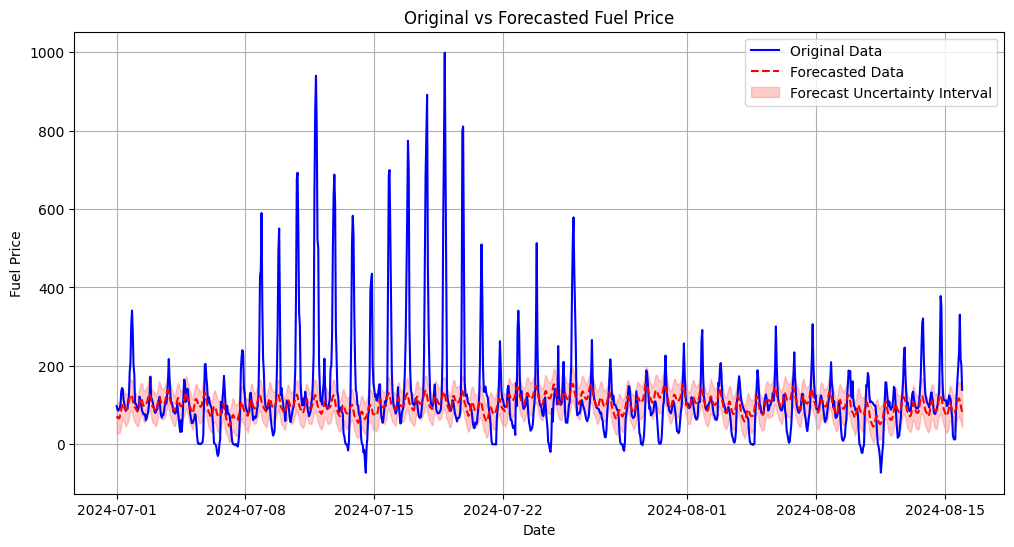

In [42]:
# Plot the original and forecasted results
plt.figure(figsize=(12, 6))
plt.plot(original_data_filtered['Date'], original_data_filtered['PriceHU'], label='Original Data', color='blue')
plt.plot(forecasted_data_filtered['ds'], forecasted_data_filtered['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot additional forecast uncertainty intervals if needed
if 'yhat_lower' in forecasted_data.columns and 'yhat_upper' in forecasted_data.columns:
    plt.fill_between(forecasted_data_filtered['ds'], 
                     forecasted_data_filtered['yhat_lower'], 
                     forecasted_data_filtered['yhat_upper'], 
                     color='red', alpha=0.2, label='Forecast Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Original vs Forecasted Fuel Price')
plt.legend()
plt.grid(True)
plt.show()